Universe, the Final Frontier
=================
Apply SparkML+GPU in High-Energy Physics Bigdata Analysis
-------------------------------------------------------

As the famous dialect in StarTrek said, ***Universe is the Final Frontier of Human Beings***. Nowadays, the research focus of data science has covered various aspects of human life, as well as the research of **advanced physics big data**. The usage of advanced data abalysis technique in high-energy physics help scientists accelerate their experiment workload, and finally leading to so many impressive successes all over the world.

The discussion of this tutorial would be based on the **HEPMASS** Data Set(2016) from University of Carlifornia, Irvine. It is consisted of 	
10500000 instances (about ***10 million***), each of which owns 28 attributes. 

We will cover the following topics in this tutorial:
1. [Introduction about Physics Bigdata Analysis](#Introduction)
2. [Traditional Data Analysis in HEPMASS Dataset](#Traditional Logistic Regression Model in HEPMASS)
4. [SparkML Data Analysis in HEPMASS Dataset](#SparkML Data Analysis in HEPMASS Dataset)
5. HEPMASS dataset: SparkML+GPU Trainning
6. Comparison and Conclusion

## 1. Introduction
### 1.1 Challenge and Motivation
The physics bigdata world is quite different from normal commercial data source. The major differences between physical bigdata and commercial bigdata could be concluded as following:
1. **Complex Data Attributes and Large Instances Number**: 
The high-energy physics experiment collects information of thousands of millions of atomics each time. And each atomic is associated with a complex attribute sets, including velocity, quality and other physics volumn.
2. **High Performance Computation(HPC) and Super Computer Bottleneck**:
In the previous decades, physicians have to depend on super computer to execute the experiment calculation. However, the super computer resources are exceedly limited in US, although the usage cost is quite high for researchers. Additionaly, programming in super computer is totally diffrent from programing in usual servers.
3. **Parallelism and Memory Challenge**:
Faced with a large set of homogeneous data, the parallelism requirement becomes more important in physics bigdata analysis than commercial data analysis. Also the traditional ML library, for example SKlearn, requires to store data in memory before execution. However, the physics data is too large to be put in the memory space of one instance.

Faced with challenges above, following architecture and components would be useful in this problem
1. **Distributed Data Anlysis System**
2. **Commercial Hardware Calculation Cluster**
3. **Heterogeneous Acclerator such as GPU**

Hence, we would propose a ***SparkML+GPU+Cloud*** framework for physics bigdata analysis, in which Cloud Cluster plays a role of infrastructure provider, Spark takes charge of calculation organization, GPU works as heterogenous accelrator. Figure1 indicates the relation between the motivation and architecture.

### 1.2 Special Note
1. This tutorial focus more on **data system architecture**, instead of data algorithm design.
2. It would be better to use the tutorial if you have **previous experience on Spark**, the most famous and popular distributed memory calculation framework. However, **feel free** if you do not know it before, since the main optimization idea is direct and easy to understand.
3. Spark Ecosystem uses java and scala as major programming language, also the system is associated with specific aws image. In other words, you **could not run this notebook directly**. However, I would provide plenty intermediate results and instructions to help you step by step.
4. I have uploaded the video in Youtube for your convenience. 

### 1.3 Best Practice
The tutorial is possibly hard to execute for readers who have not used Spark before. To give you a direct experience about how it works, I have made a Google Cloud Platform Image, so that you could use it to have a fresh experience about the power of distributed computation.

Please take following step as reference :

***Best Practice in Chapter2: Traditional ML***
1. Initialize a Google Cloud Platform account and build a new project for this problem.
2. Log into the project, use the image "" to launch a new instance.
3. Use the GCP dashboard to ssh to the instance. All dependency file has been lied in the directory ```~/SparkMLGPU-Physics```.
4. Get into the work directory, type ```jupyter notebook``` to open the directory
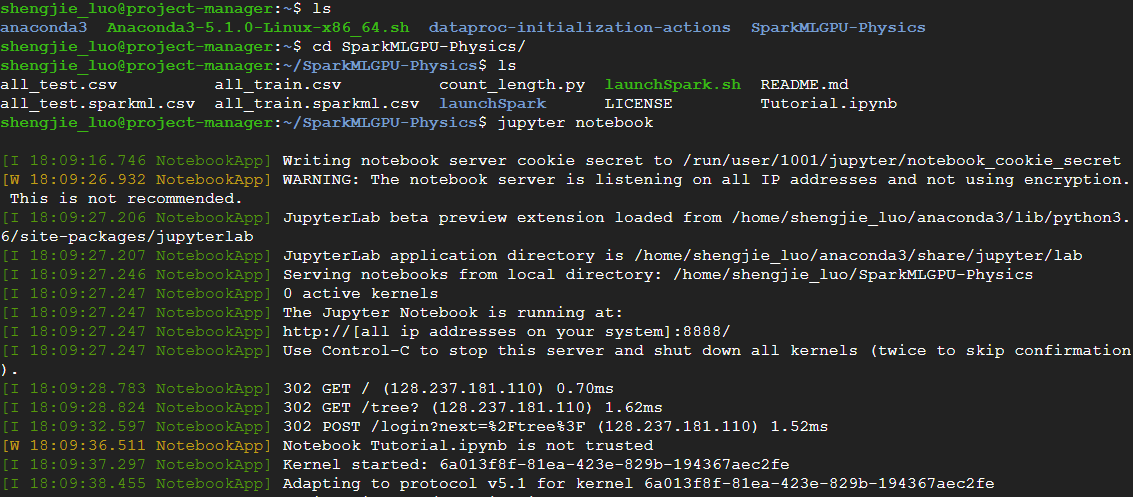
5. Then, open the browser and use ```http://<Your_Instance_IP_Address>:8888/``` to open the jupyter notebook with password ```123456```. ```Tutorial.ipynb``` could help you to run through all programs in traditional model.

***Best Practice in Chapter3: SparkML***
1. After you run through the traditional model in chapter2, you would continue the following procedure in **Gougle Dataproc Cluster**. First, use ```gcloud init``` to initial the gcloud configuration.
2. The initial script of dataproc cluster has been lied in the work directory. Run ```./launchCluster.sh``` to launch new cluster automatically. Figure 1 indicates the launch result.
3. Revise the firewall rule of ```sparkmlgpu-m``` to allow the income tcp flow in port ```8080```.
4. Use ```<sparkmlgpu-m_ip_address>:8080``` in your web browser to view the Zeppelin Interface.
5. Click ```import note``` and upload following url ```https://github.com/ShengjieLuo/SparkMLGPU-Physics/blob/master/zeppelin.json``` into Zeppelin. So that you could get an interactive script to run following process. Samll tips that you could use ```shift+enter``` to run Zeppelin cells like Jupter Notebook.
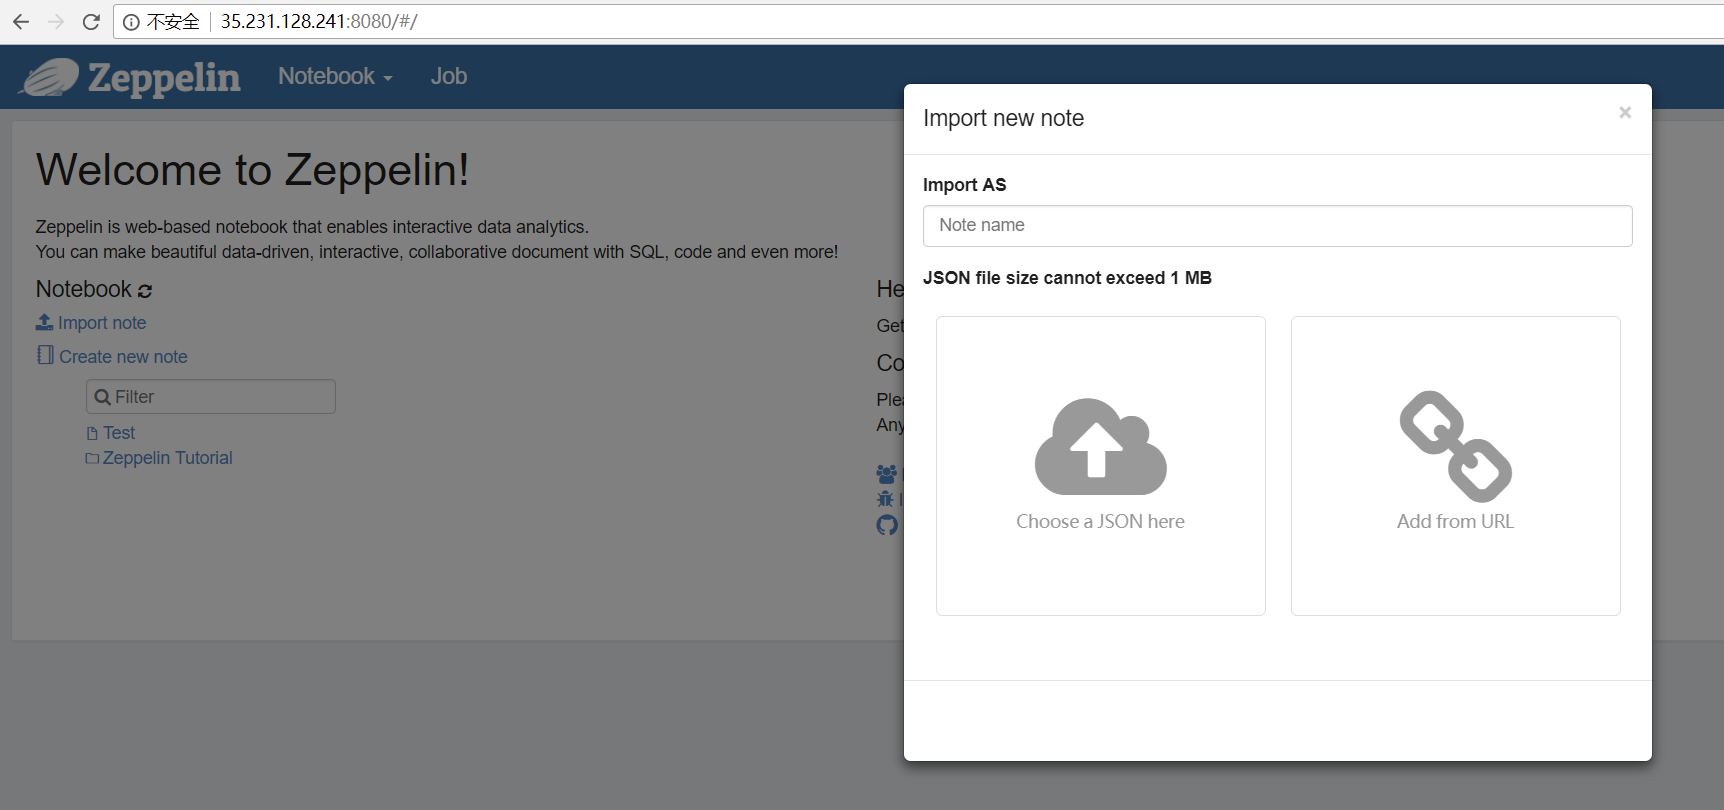

***Best Practice in Chapter5: SparkMLGPU***
1. So far, you have gotten a first glance at SparkML, then we would use the AWS GPU instance to fullfill the SparkMLGPU practice. First, you need have an available AWS account and log into that account.
2. Use the image "" to launch a new instance.
4. Use ```pem``` key to log into the instance, the work directory is still ```~/SparkMLGPU-Physics```
5. Execute ```~/SparkMLGPU-Physics/run_verify.sh``` and verify whether it is successfully deployed.
6. Execute ```~/SparkMLGPU-Physics/run_chapter5.sh```, the result is shown in the screen.

## 2. Traditional Data Analysis in HEPMASS Dataset
### 2.1 Dataset Explanation and Preprocess
In this model, Machine learning is used in high-energy physics experiments to search for the signatures of exotic particles. These signatures are learned from Monte Carlo simulations of the collisions that produce these particles and the resulting decay products. The goal of this model is to separate particle-producing collisions from a background source. 

Following the command below to download the dataset.(The file has been downloaded into the image)
```
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00347/all_train.csv.gz
gzip -d all_train.csv.gz
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00347/all_test.csv.gz
gzip -d all_test.csv.gz
```
The first column is the class label (1 for signal, 0 for background), followed by the 27 normalized features (22 low-level features then 5 high-level features), and a 28th mass feature. The first sample in train dataset looks as following

In [1]:
def printFirstDataSample(csvfile):
    f = open(csvfile)
    indexLine = f.readline()
    dataLine  = f.readline()
    print("Index Line\n",indexLine)
    print("Data Line\n",dataLine)
printFirstDataSample("all_test.csv")

Index Line
 # label,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass

Data Line
 0.000000000000000000e+00,9.439358860254287720e-02,1.275558676570653915e-02,9.119330644607543945e-01,-9.083136916160583496e-02,-2.335745543241500854e-01,-1.054220795631408691e+00,-9.759366512298583984e-01,-1.067278265953063965e+00,-6.138502955436706543e-01,7.542607188224792480e-01,-9.256605505943298340e-01,-5.289512276649475098e-01,1.235263347625732422e+00,8.606486320495605469e-01,-2.320102453231811523e-01,-4.043335020542144775e-01,-1.559396624565124512e+00,-8.154401183128356934e-01,-1.376865267753601074e+00,6.759096682071685791e-02,1.372575879096984863e+00,-5.736824870109558105e-01,-1.368692040443420410e+00,-4.793794453144073486e-01,1.529256343841552734e+00,-5.757816433906555176e-01,-1.290232419967651367e+00,4.999999694824218750e+02



The dataset is too large for a traditional scikit machine learning. Totally running through all datasets takes too mauch time to wait, in order to give you a sense of its efficiency, we would first divide a 10% dataset for experiment

In [2]:
def producePercentSubset(percent,csvfile):
    f = open(csvfile)
    wf = open(csvfile+"."+str(percent),'w')
    if csvfile=="all_train.csv":
        count = percent/100.0 * 7000000
    elif csvfile=="all_test.csv":
        count = percent/100.0 * 3000000
    else:
        print("Invalid csv file")
        return
    indexLine = f.readline()
    wf.write(indexLine)
    while (count>0):
        row = f.readline()
        wf.write(row)
        count -= 1
    
producePercentSubset(10,"all_train.csv")
producePercentSubset(10,"all_test.csv")

After sampling the dataset, the directory organization is as following,
```
ubuntu@ip-172-31-91-240:~/tutorial$ ls -ail
total 8091356
1041180 -rw-rw-r--  1 ubuntu ubuntu 2589223661 Feb  3  2016 all_test.csv
1041078 -rw-rw-r--  1 ubuntu ubuntu 5178435596 Feb  3  2016 all_train.csv
1041079 -rw-rw-r--  1 ubuntu ubuntu  517845288 Mar 26 17:57 all_train.csv.10
1041081 -rw-rw-r--  1 ubuntu ubuntu       8313 Mar 26 17:57 Tutorial.ipynb
```

The ML job in this task is a binary classification problem, and Logistic Regression is one of the recommended methods to classify two clusters of datapoints. Also Logistic Regression is the algorithm suitable for parallel execution, which leading to a quick GPU CUDA implementation.

## 2.2 Logistic Regression Classifier
In this step, we selected the scikit library in python3 to implement the logistic regression.
Following calculation is executed on the Google Cloud Platform with 26GB memory and 4 cores.For each execution longer than 1 minute, an estimated running time would be provided.

Environment Requirement:
1. **Memory**: >=16G (recommended:32G) 
2. **Cores** : >=2  (recommended:4)
3. **GPU**   : N/A
4. **Storage**: >=12G (recommended:30G)

**Note: Only run small dataset, if your server has less than 16GB memory, otherwise, your jupyter notebook would crash without any response**

First, the data is extracted from the trainning set. (*Estimated Time:1.5 min*)

Extract 10% dataset
```
Timestamp before reading:2018-03-27 03:00:03.100450
Timestamp after reading:2018-03-27 03:00:42.233126
```
Extract total dataset
```
Timestamp before reading:2018-03-27 03:21:39.190732
Timestamp after reading:2018-03-27 03:26:55.688656
```

In [5]:
from datetime import datetime
def readData(csvfile):
    f = open(csvfile)
    dataset = []
    targetset = []
    indexLine = f.readline()
    lines = f.readlines()
    for line in lines:
        line = line.strip().split(',')
        tmpset = []
        targetset.append(float(line[0]))
        for i in range(1,len(line)):
            tmpset.append(float(line[i]))
        dataset.append(tmpset)
    return (dataset,targetset)

print("Timestamp before reading:"+str(datetime.now()))
(dataset_train_10,targetset_train_10) = readData("all_train.csv.10")
(dataset_test_10 ,targetset_test_10 ) = readData("all_test.csv.10")
print("Timestamp after reading:"+str(datetime.now()))

'''
#Execute the large dataset only if you have >16G memory
print("Timestamp before reading:"+str(datetime.now()))
(dataset_train,targetset_train) = readData("all_train.csv")
(dataset_test,targetset_test) = readData("all_test.csv")
print("Timestamp after reading:"+str(datetime.now()))
'''

Timestamp before reading:2018-03-27 03:41:05.418181
Timestamp after reading:2018-03-27 03:41:39.894792


'\n#Execute the large dataset only if you have >16G memory\nprint("Timestamp before reading:"+str(datetime.now()))\n(dataset_train,targetset_train) = readData("all_train.csv")\n(dataset_test,targetset_test) = readData("all_test.csv")\nprint("Timestamp after reading:"+str(datetime.now()))\n'

Then ,we import **Logistic Regression Model** from *sklearn* to train this model.

The sample output of 10% dataset:
```
Total Train Size:700000
Timestamp before train:2018-03-27 03:01:09.463669
Timestamp after train:2018-03-27 03:01:24.814552
```
The sample output of total dataset:
```
Total Train Size:7000000
Timestamp before train:2018-03-27 03:34:47.061060
Timestamp after train:2018-03-27 03:37:25.162981
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import linear_model, datasets

def LRModelTrain(stepSize,trainSet,targetSet):
    print("Total Train Size:"+str(len(targetSet)))
    print("Timestamp before train:"+str(datetime.now()))
    X = trainSet
    Y = targetSet
    h = stepSize
    lrmodel = linear_model.LogisticRegression(penalty='l2',C=1e5,solver='lbfgs',n_jobs=-1)
    lrmodel.fit(X, Y)
    print("Timestamp after train:"+str(datetime.now()))
    return lrmodel

#lrModel = LRModelTrain(0.01,dataset_train_10,targetset_train_10)

#Execute the large dataset only if you have >16G memory
lrModel = LRModelTrain(0.01,dataset_train,targetset_train)

Total Train Size:7000000
Timestamp before train:2018-03-27 03:34:47.061060
Timestamp after train:2018-03-27 03:37:25.162981


After fetching the lrModel, we use the lrModel to predict

The sample output of predicting 10% target dataset:
```
Timestamp after test:2018-03-27 03:42:10.440674
Timestamp after test:2018-03-27 03:42:10.877418
0.8357166666666667
```

The sample output of predicting total target dataset:
```
Timestamp after test:2018-03-27 03:39:57.233732
Timestamp after test:2018-03-27 03:40:03.268416
0.8359454285714286
```

In [7]:
def LRModelPredict(model,dataset_test,target_test):
    accuracy = model.score(dataset_test,target_test)
    return accuracy

print("Timestamp after test:"+str(datetime.now()))
accuracy = LRModelPredict(lrModel,dataset_test_10,targetset_test_10)
print("Timestamp after test:"+str(datetime.now()))
print(accuracy)

Timestamp after test:2018-03-27 03:42:10.440674
Timestamp after test:2018-03-27 03:42:10.877418
0.8357166666666667


Figure2 indicates the time distribution in this task.Within the dataset size increasing, the trainning time and predicting time increases more quickly than data reading time. The total dataset takes about 10 minutes to complete, while the small dataset takes about 1 minute. 
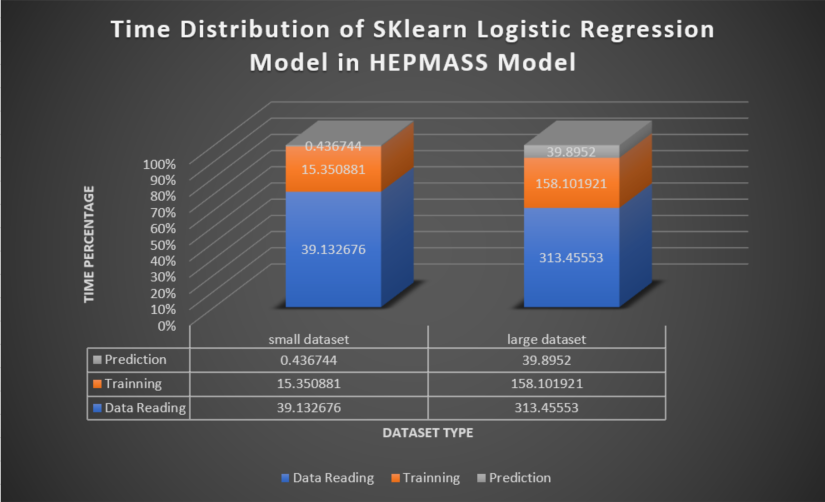

# 3. SparkML Data Analysis in HEPMASS Dataset

In this chapter, I would first introduce the Spark deployment in GCP. And then, **Logistic Regression Classifier** is applied to extract the major features. Also, **Principal Component Analysis** algorithm is used to extract the principal component of the dataset. Finally, we use ```matplotlib``` to visuallize the principal components.

>***Why we select SparkML to do large dataset machine learning?***

>***Altghough there are several distributed Machine Learning tool currently, such as Tensorflow or Caffe. However, these tools are specified to machine learning algorithm, and isolated from data preprocess and ETL. While Spark Ecosystem combines ML and preprocess together to build a complete data analysis pipeline, helping us to accelerate this procedure.***

>***Why we use Zeppelin Notebook in this part?***

>***Zeppelin Notebook is supported officially for the interactive data analysis in Spark Ecosystem. Zeppelin is highly integrated into Spark Core packages and indicates the task process clearly, while Jupyter Notebook does not keep these features. The deployment and usage of Zeppelin is explained in the chapter1 Best Practice. Great thanks for your patience and have fun in the big data world.***

## 3.1 SparkML Cluster on GCP
Spark is the most popular distributed calculation framework today, which emplying the power of distributed cluster to fullfill the machine learning tasks. The key idea of SparkML is to divide the large matrix into several block matrixes. And then each block matrix would be scheduled into the task executor, so that a large matrix calculation could be calculated parallely.

Google Cloud Platform provides the **Dataproc** service to help users quickly deploy spark cluster on cloud environment. Additionally, GCP provides $300 coupon for new users, therefore, don't hesitate to have a try. The power of distributed computing system would definitely impress you. Figure3 indicates the configuration of the spark cluster launched by ```~/SparkMLGPU-Physics/launchCluster.sh```.
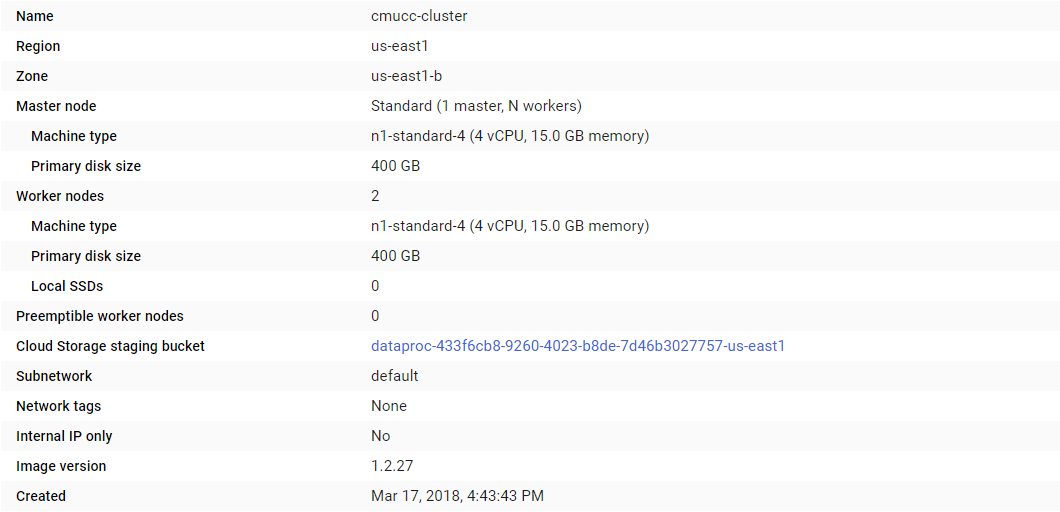

Refer to [Best Practice in chapter3 SparkML](#Best Practice) for more deploymeny information.

## 3.2 SparkML Logistic Classifier

Following is the program to run **logistic regression classifier** on HERMASS data set. The logistic classifier uses **LBFGS** as the kernel function to help identifing data points. The parameter used in this program is the same with previous the traditional ML model.

The sample output is
```
Timestamp before read data:2018-03-29 18:31:07.174520
('Train Dataset Count:', 7000000)
('Test  Dataset Count:', 3500000)
Timestamp after read data:2018-03-29 18:33:01.765841
Timestamp before trainning:2018-03-29 18:33:01.766313
Timestamp after trainning:2018-03-29 18:34:01.615184
Timestamp before prediction:2018-03-29 18:34:01.615749
Timestamp after prediction:2018-03-29 18:34:11.957867
Prediction Error = 0.184262571429
```

In [6]:
'''
IMPORTANT NOTE!!
This cell is ran in the zeppelin notebook. Please refer to the Best Practise to open the Zeppelin notebook.
'''
try:
    from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionModel
    from pyspark.mllib.regression import LabeledPoint
    import pyspark
    from datetime import datetime
    # Parse the data
    def parsePoint(line):
        values = [float(x) for x in line.split(',')]
        return LabeledPoint(values[0], values[1:-1])

    print("Timestamp before read data:"+str(datetime.now()))
    trainRDD = sc.textFile("gs://dataproc-40cee9d2-1670-480a-8172-f1c4645b382a-us/all_train.sparkml.csv")
    testRDD  = sc.textFile("gs://dataproc-40cee9d2-1670-480a-8172-f1c4645b382a-us/all_test.sparkml.csv")
    trainRDD = trainRDD.map(parsePoint).cache()
    testRDD  = testRDD.map(parsePoint).cache()
    print("Train Dataset Count:",trainRDD.count())
    print("Test  Dataset Count:",testRDD.count())
    print("Timestamp after read data:"+str(datetime.now()))

    #Build the model
    print("Timestamp before trainning:"+str(datetime.now()))
    model = LogisticRegressionWithLBFGS.train(trainRDD)
    print("Timestamp after trainning:"+str(datetime.now()))

    # Evaluating the model on training data
    print("Timestamp before prediction:"+str(datetime.now()))
    labelsAndPreds = testRDD.map(lambda p: (p.label, model.predict(p.features)))
    testErr = labelsAndPreds.filter(lambda lp: lp[0] != lp[1]).count() / float(testRDD.count())
    print("Timestamp after prediction:"+str(datetime.now()))
    print("Prediction Error = " + str(testErr))
except:
    print("Please convert to Zeppelin Notebook. Thanks for your patient.")

Please convert to Zeppelin Notebook. Thanks for your patient.


Up till now, we have used ```sklearn``` and ```sparkML``` to analysis the same dataset with the same model and parameters. Also, we get a similiar prediction result between these two models. According to the log printed, the time used by ```SparkML``` is much less than the time used by ```sklearn```. Following fiugre compares the time distribution in these two implementations.
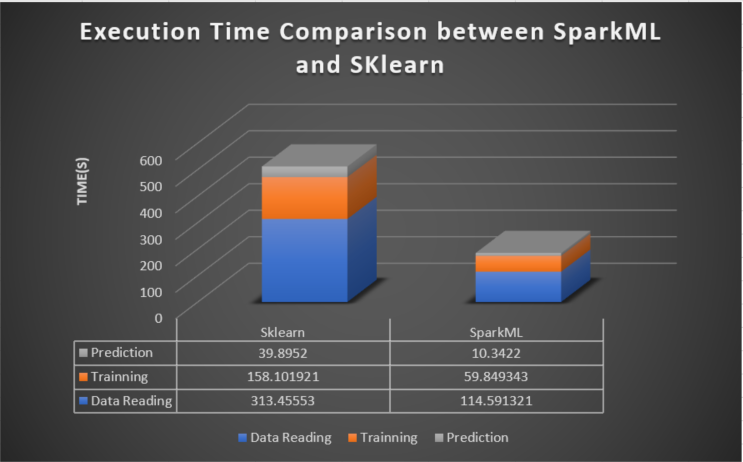

Note that sklearn uses 1 core, while sparkml uses 4 cores in this task. The phenomenon tells us that:
1. The acceleration ratio of SparkML is approching the ideal **linear acceleration ratio**.
2. ***Data Reading Accelration***: SparkML reads the file from **distributed file system**, which guarantees the parallel data reading and leads to a better reading velocity.
3. ***Trainning Acceleration***: Most of the time used in logistic regression classifier trainning is **Matrix Multiplication**, especially when the system handles the large matrix multiplication. SparkML divides the large matrix into a group of **Block Matrices**, and executes the block matrices muliplication parallelly.
4. ***Prediction Acceleration***: SparkML divides the test dataset into several small partitions, and each partition could be scheduled into an independent executor, so that the prediction could be executed in parallel.
5. ***Bottleneck***: The bottleneck of single-machine learning could be concluded into two aspects, memory bottleneck and calculation bottleneck. And the occurrance of distributed ML implementation helps us with both these two bottlenecks.

## 3.3 SparkML PCA and visualization
**Principal component analysis (PCA)** is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. It is a useful method to handle the high dimensional data. Following program indicates the method to handle the PCA analysis in HERMASS dataset

The sample output is 
```
Timestamp before pca:2018-03-29 17:55:59.465559
Timestamp after pca:2018-03-29 17:58:46.221059
```

In [7]:
'''
IMPORTANT NOTE!!
This cell is ran in the zeppelin notebook. Please refer to the Best Practise to open the Zeppelin notebook.
'''
try:
    import pyspark
    from pyspark.mllib.linalg import Vectors
    from pyspark.mllib.linalg.distributed import RowMatrix
    from datetime import datetime
    
    # Parse the data
    def parsePoint(line):
        values = [float(x) for x in line.split(',')]
        return Vectors.dense(values[1:-1])

    # Parse the label
    def parseLabel(line):
        label = float(line.split(',')[0])
        return label

    print("Timestamp before pca:"+str(datetime.now()))
    rawRDD = sc.textFile("gs://dataproc-40cee9d2-1670-480a-8172-f1c4645b382a-us/all_train.sparkml.csv").cache()
    labels = rawRDD.map(parseLabel).cache()
    trainRDD = rawRDD.map(parsePoint)

    # Compute the top 4 principal components.
    # Principal components are stored in a local dense matrix.
    mat = RowMatrix(trainRDD)
    pc = mat.computePrincipalComponents(2)

    # Project the rows to the linear space spanned by the top 4 principal components.
    projected = mat.multiply(pc).rows.cache()
    print("Timestamp after pca:"+str(datetime.now()))
except:
    print("Please convert to Zeppelin Notebook. Thanks for your patient.")

Please convert to Zeppelin Notebook. Thanks for your patient.


After handling PCA analysis, the low dimensional data could be easily visualized and help us to have a direct sense of the dataset. In this tutorial, we reduce the dimension number from 27 dimensions to 2 dimensions, so that we could plot datapoint in the canvas. However, there are too many points to be shown in the canvas, hence, we **sample** only a small percentile of data points to be shown in canvas.

In the canvas, the **red point** indicates the positive samples with label ```1```, while the **blue point** indicates the negative samples with label ```0```.
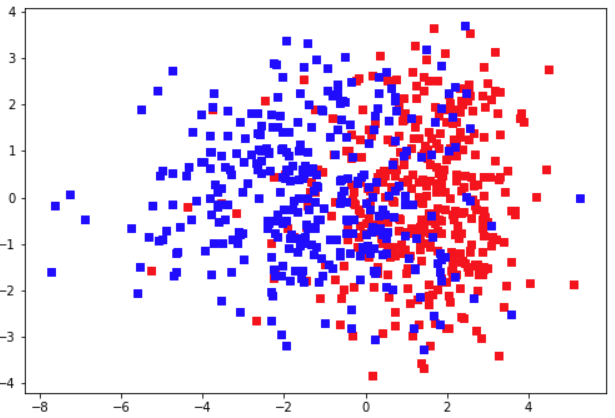

We apply the **principal component** learnt from the trainning set to test dataset to comment the learning result by following program. 

In [11]:
try:
    #Test Dataset PCA analysis
    import pyspark
    from pyspark.mllib.linalg import Vectors
    from pyspark.mllib.linalg.distributed import RowMatrix
    from datetime import datetime
    import matplotlib.pyplot as plt

    def parsePoint(p):
        return Vectors.dense(p.features)

    def getCol(dataset):
        dataset = dataset.collect()
        length = len(dataset)
        X = []
        Y = []
        for i in range(0,length,10000):
            X.append(dataset[i].values[0])
            Y.append(dataset[i].values[1])
        return X,Y
    
    PositiveSamples = testRDD.filter(lambda p:p.label==1).map(parsePoint)
    NegativeSamples = testRDD.filter(lambda p:p.label==0).map(parsePoint)
    mat1 = RowMatrix(PositiveSamples)
    mat2 = RowMatrix(NegativeSamples)
    projected1 = mat1.multiply(pc)
    projected2 = mat2.multiply(pc)
    rows1 = projected1.rows.cache()
    rows2 = projected2.rows.cache()

    data1 = getCol(rows1)
    data2 = getCol(rows2)
    plt.plot(data1[0], data1[1], 'rs', data2[0], data2[1], 'bs')
except:
    print("Please convert to Zeppelin Notebook. Thanks for your patient.")

Please convert to Zeppelin Notebook. Thanks for your patient.


When we compare the two figures produced by training set and test set, we find that these two sets follow similiar figure patterns, which indicates the effect of our logistic classfier.
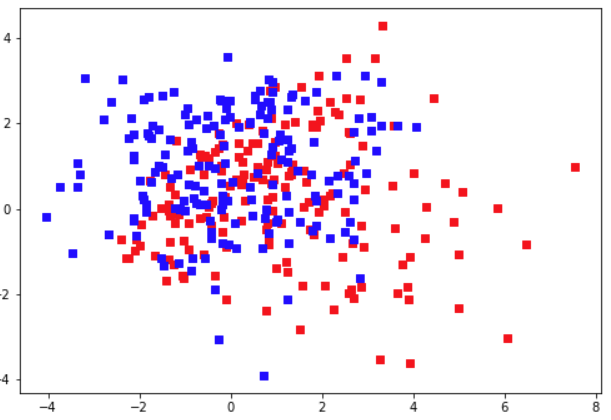

# 4. SparkML+GPU Data Analysis in HEPMASS Dataset

## 4.1 Why SparkML+GPU
If we review the big data analysis nowadays, we would find a great gap between two most important parts of data analysis, **ETL(Extract-Transform-Load)** and **machine learning**. 

**ETL** handles the raw dataset, which is usually mixed with plenty of noises and dirty data points. The valuable datapoints is trsformed into clean datasets for following analysis.Nowadays, the large dataset is usually handled by **Spark** or **Elastic Search** to complete handle tasks.

**Machine Learning**,in another hands, handles clear dataset within a complex model. Currently, **Tensorflow**, **Caffe**, **Pytorch** fully employs the GPU power to accelerate the machine learning tasks.

However, these two tasks are isolated in the research world today! There is no unified framework to combine these two tools together. The gap between two parts means that researchers have to keep the output of ETL in the file system, and requires ML tools to read from files, vice versa. In other words, **the isolation means repeated unnecessary disk IO**. 

Today, the ETL guys would like to involve ML TOOLS into their frameworks, it is why **SparkML** develops so quickly today! It is an impressive and meaningful progress both in bigdata world and machine learning would. Among these progresses, **SparkML+GPU** is one of the most popular trending.

## 4.2 SparkML+GPU Effect
In this tutorial, we use the **SparkGPUEnabler** from **IBM** to enable this attempt. **SparkGPUEnabler** is an opensource project managed by ibm cloud team, and also a part of *IBM Spark Branch*. Considering the high price of cloud gpu device, we would only deploy a standalone spark cluster in this part.

In standalone mode, the node is both a master and a worker. Also, it would use all cores in the instance to complete the Spark task. For your convenience, I have build the **SparkMLGPU** image in AWS cloud platform. Please refer to ***chapter1. Best Practice*** for more information. Thanks for your patience.

After you log into the instance, execute following scipts to run the example
```
[ec2-user@ip-172-31-91-162 ~]$ cd SparkMLGPU-Physics/
[ec2-user@ip-172-31-91-162 SparkMLGPU-Physics]$ python runGPU.py
```

In [2]:
#runGPU.py. Execute in the specific gpu instance.
try:
    import commands
    tests = [100,1000,10000,100000,200000,300000,400000,500000,600000,700000]
    for test in tests:
        cmd = 'mvn exec:java -Dexec.mainClass="com.ibm.gpuenabler.SparkGPULR" -Dexec.args="local[*] 2 %d 10 5"|grep "Elapsed time"'%(test)
        out = commands.getoutput(cmd)
        gputime = int(out.split('\n')[0].split()[-2])
        cputime = int(out.split('\n')[1].split()[-2])
        print("Trainset Data Points:%d Dimension:%d GPUtime:%d CPUtime:%d"%(test,10,gputime,cputime))
except:
    print("Please convert to AWS Image. Thanks for your patient.")

Please convert to AWS Image. Thanks for your patient.


The program compares the execution efficiency of GPU and CPU in logistic regression. Since SparkGPUEnabler only supports java and scala, I could not show the java/scala content in this tutorial. However, the scala source code could be found in my AWS image.

The comparison indicates the efficiency difference within the dataset size increasing. The dataset is produced by specified size and dimensions, but the value of each element is a random value.The logistic regression only takes 5 iteration in this example, even it does not convenge to the final result. Note that we use **8 cpu cores** in cpu execution, and only **one gpu core** in gpu execution. The sample output could be:
```
Trainset Data Points:100 Dimension:10 GPUtime:244 CPUtime:142
Trainset Data Points:1000 Dimension:10 GPUtime:274 CPUtime:149
Trainset Data Points:10000 Dimension:10 GPUtime:352 CPUtime:294
Trainset Data Points:100000 Dimension:10 GPUtime:318 CPUtime:634
Trainset Data Points:200000 Dimension:10 GPUtime:300 CPUtime:910
Trainset Data Points:300000 Dimension:10 GPUtime:327 CPUtime:1085
Trainset Data Points:400000 Dimension:10 GPUtime:411 CPUtime:1537
Trainset Data Points:500000 Dimension:10 GPUtime:370 CPUtime:1635
Trainset Data Points:600000 Dimension:10 GPUtime:475 CPUtime:1836
Trainset Data Points:700000 Dimension:10 GPUtime:385 CPUtime:2356
```

According to the sample report, GPU takes the efficiency advantage if there is a large dataset, since GPU enjoys a far more better parallelism  than CPU. However, GPU does not shares the same memory space with main memory, hence, it takes more time to transmiss the data from main memory to GPU memory.

In one word, the efficiency decision between CPU and GPU is **a balance between data calculation performance and data transmission performance**. Usually, GPU is a better choice for data analysis in large dataset.